In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

(109, 2) shape of Data Frame
   Waist     AT
0  74.75  25.72
1  72.60  25.89
2  81.80  42.60
3  83.95  42.80
4  74.65  29.84
5  71.85  21.68
6  80.90  29.08
7  83.40  32.98
8  63.50  11.44
9  73.20  32.22


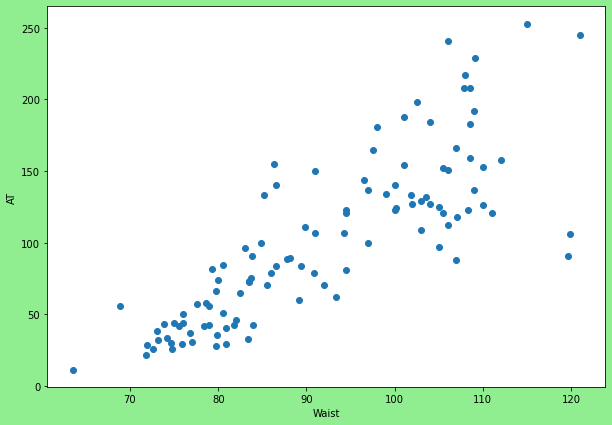

In [16]:
wcat=pd.read_csv("wc-at.csv")
print(wcat.shape,"shape of Data Frame")
print("="*30)
print(wcat.head(10))
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(wcat.Waist,wcat.AT)
plt.xlabel("Waist")
plt.ylabel("AT")
plt.show()

In [19]:
wcat.corr()  # as waist and at have value equal to 1 (+ve correlation)

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [20]:
wcat.shape

(109, 2)

# Creating model with SKLEARN

In [21]:
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [23]:
lm=LinearRegression()
X=wcat["Waist"].values.reshape(-1,1)  
Y=wcat["AT"].values.reshape(-1,1)
reg_sklearn=lm.fit(X,Y)

In [28]:
wcat["AT"].values.reshape(-1,1)

array([[ 25.72],
       [ 25.89],
       [ 42.6 ],
       [ 42.8 ],
       [ 29.84],
       [ 21.68],
       [ 29.08],
       [ 32.98],
       [ 11.44],
       [ 32.22],
       [ 28.32],
       [ 43.86],
       [ 38.21],
       [ 42.48],
       [ 30.96],
       [ 55.78],
       [ 43.78],
       [ 33.41],
       [ 43.35],
       [ 29.31],
       [ 36.6 ],
       [ 40.25],
       [ 35.43],
       [ 60.09],
       [ 45.84],
       [ 70.4 ],
       [ 83.45],
       [ 84.3 ],
       [ 78.89],
       [ 64.75],
       [ 72.56],
       [ 89.31],
       [ 78.94],
       [ 83.55],
       [127.  ],
       [121.  ],
       [107.  ],
       [129.  ],
       [ 74.02],
       [ 55.48],
       [ 73.13],
       [ 50.5 ],
       [ 50.88],
       [140.  ],
       [ 96.54],
       [118.  ],
       [107.  ],
       [123.  ],
       [ 65.92],
       [ 81.29],
       [111.  ],
       [ 90.73],
       [133.  ],
       [ 41.9 ],
       [ 41.71],
       [ 58.16],
       [ 88.85],
       [155.  ],
       [ 70.77

In [32]:
print(reg_sklearn.coef_) #alpha
print(reg_sklearn.intercept_) #beta

[[3.45885939]]
[-215.98148796]


In [33]:
reg_sklearn.predict(X) #yhat

array([[ 42.56825159],
       [ 35.1317039 ],
       [ 66.95321031],
       [ 74.389758  ],
       [ 42.22236565],
       [ 32.53755936],
       [ 63.84023685],
       [ 72.48738533],
       [  3.65608343],
       [ 37.20701954],
       [ 32.71050233],
       [ 43.43296644],
       [ 36.8611336 ],
       [ 57.26840401],
       [ 50.35068522],
       [ 22.16098118],
       [ 46.71888286],
       [ 40.49293596],
       [ 39.28233517],
       [ 46.54593989],
       [ 49.83185632],
       [ 63.84023685],
       [ 60.38137746],
       [ 92.54876981],
       [ 67.64498219],
       [102.23357611],
       [ 83.55573539],
       [ 62.4566931 ],
       [ 81.48041975],
       [ 69.37441188],
       [ 72.83327127],
       [ 88.74402448],
       [ 98.08294484],
       [ 93.24054169],
       [136.82217003],
       [110.88072459],
       [ 98.77471671],
       [140.28102942],
       [ 60.7272634 ],
       [ 57.26840401],
       [ 72.83327127],
       [ 46.89182583],
       [ 62.4566931 ],
       [ 83

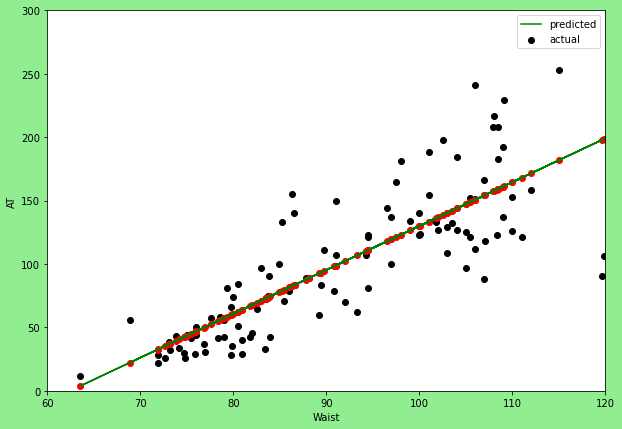

In [37]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(wcat.Waist,wcat.AT,color="black",label="actual")
plt.plot(wcat.Waist,reg_sklearn.predict(X),label="predicted",color="green",linestyle="-")
plt.scatter(wcat.Waist,reg_sklearn.predict(X),color="red")
plt.xlabel("Waist")
plt.ylabel("AT")
plt.xlim(60,120)
plt.ylim(0,+300)
plt.legend(loc="best")
plt.show()

# Model Validation

In [38]:
pred_train_lm=reg_sklearn.predict(X)
r2_score(wcat["AT"],pred_train_lm)

0.6700368930528429

# Model with statsmodels

In [39]:
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [40]:
first_model=smf.ols("AT~Waist",data=wcat).fit()

In [41]:
first_model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [42]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           1.62e-27
Time:                        17:23:07   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model2=smf.ols("AT~np.log(Waist)",data=wcat).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           6.80e-28
Time:                        14:11:36   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model3=smf.ols("np.log(AT)~Waist",data=wcat).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           2.68e-30
Time:                        14:14:19   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
wcat["Waist_Sq"]=wcat.Waist**2
model4=smf.ols("np.log(AT)~Waist+Waist_Sq",data=wcat).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           1.80e-35
Time:                        14:18:05   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist          0.2289      0.032      7.107      0.000       0.165       0.293
Waist_Sq      -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""